In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import deque
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

###DBSCAN


In [ ]:
def dbscan(epsilon,data,min_pts):
  # data = data.to_numpy()
  # tree = BallTree(data,leaf_size = 40)
  # graph = tree.query_radius(X = data,r = epsilon)
  min_pts+=1
  frame = data
  data = data.to_numpy()
  graph = []
  for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]

    d = np.sqrt((x-frame['0'])**2+(y-frame['1'])**2)
    nbr = list(frame[(d<=epsilon)].index)
    graph.append(nbr)

  core = [False]*len(data)
  visited = [False]*len(data)
  q = deque()
  clusters = []
  cluster = []

  for i in range(len(graph)):
    if len(graph[i])>=min_pts:
      core[i] = True
  for i in range(len(core)):
    if visited[i] == False and core[i] == True:
      cluster = []
      q.append(i)
      while len(q)>0:
        temp = q.popleft()
        for i in graph[temp]:
          if core[i] == True and visited[i] == False:
            q.append(i)
          visited[i] = True
          cluster.append(i)
      clusters.append(cluster)
  noise = []
  for i in range(len(visited)):
    if visited[i] == False:
      noise.append(i)
  for i in range(len(clusters)):
    clusters[i] = np.unique(clusters[i])
  clusters.append(noise)
  return clusters

def plot_clusters(clusters,dat,g,h):
  dat = dat.to_numpy()
  d = []
  color = []
  for i in range(len(clusters)):
    k = (100*i)/len(clusters)
    for j in clusters[i]:
      d.append(dat[j])
      color.append(k)
  d = np.array(d)
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot()
  ax.set_title(f'epsilon = {g}, min_pts = {h}')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.scatter(d[:,0],d[:,1],c=color,cmap = 'viridis',s=[1]*len(d))

def silhouettescore(data,clusters):
  dat = data.to_numpy()
  d = []
  color = []
  for i in range(len(clusters)):
    for j in clusters[i]:
      d.append(dat[j])
      color.append(i)
  return silhouette_score(d, color)



  

###Datasets

In [ ]:
data_2 = pd.read_csv("/content/dataset_2.csv")
data_3 = pd.read_csv("/content/dataset_3.csv")

###Standardization

In [ ]:
#not required if done no problem
mean = data_2.mean()
std = data_2.std()
data = data_2-mean
data = data/std
print(std)

0    289.502561
1    287.710269
dtype: float64


###Visualizing the data

Text(0, 0.5, 'y')

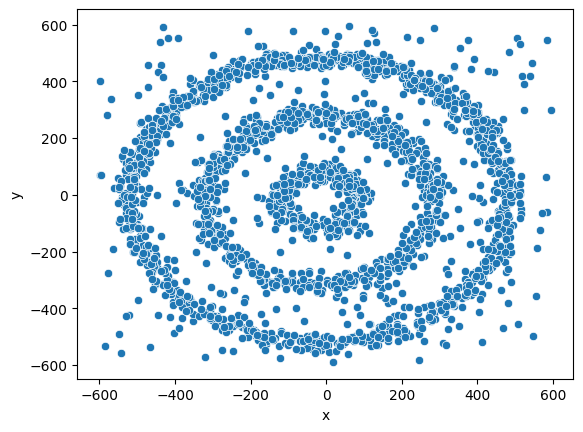

In [ ]:
sns.scatterplot(x = data_2['0'],y = data_2['1'])
plt.xlabel('x')
plt.ylabel('y')

###Elbow curve - dataset 2

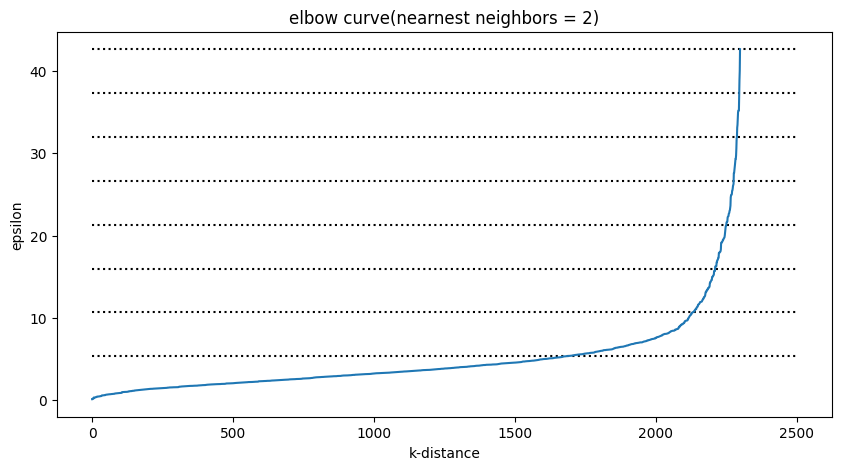

In [ ]:
plt.figure(figsize = (10,5))
k = 2
elbow = NearestNeighbors(n_neighbors=k).fit(data_2)
distance, _ = elbow.kneighbors(data_2)
distance = [i.mean() for i in distance]
distance = np.sort(distance,axis=0)
maximum = distance[np.argmax(distance)]/8
lines = [maximum*(i+1) for i in range(8)]
#distance = distance[:,3]
plt.hlines(lines,0,2500,colors='k',linestyles='dotted')
plt.title(f'elbow curve(nearnest neighbors = {k})')
plt.xlabel('k-distance')
plt.ylabel('epsilon')
plt.plot(distance)

###Hyper parameter tuning(dataset_2)

10 4 69
10 5 30
10 6 13
10 7 3
10 8 2
15 4 107
15 5 104
15 6 68
15 7 48
15 8 31
20 4 28
20 5 34
20 6 47
20 7 57
20 8 57
25 4 5
25 5 8
25 6 14
25 7 17
25 8 21
30 4 4


<ipython-input-13-34acc049b71b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5,5))


30 5 4
30 6 5
30 7 5
30 8 5
35 4 4
35 5 4
35 6 4
35 7 4
35 8 4
40 4 3
40 5 3
40 6 4
40 7 4
40 8 4


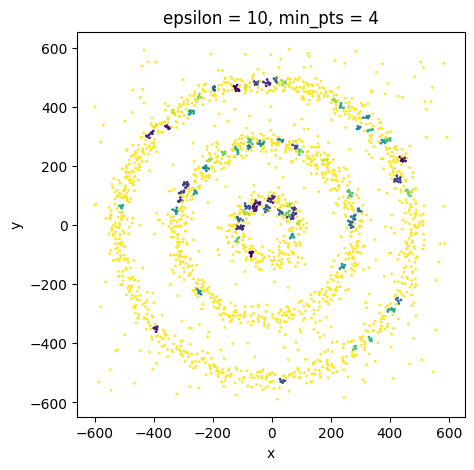

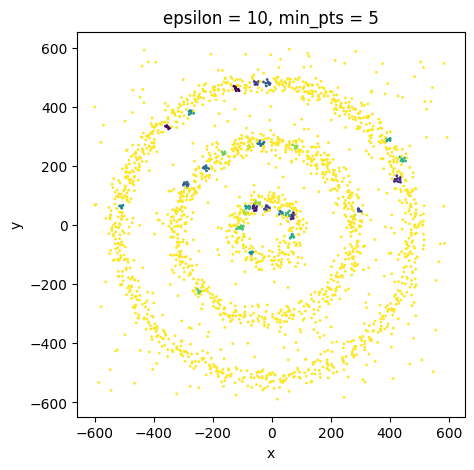

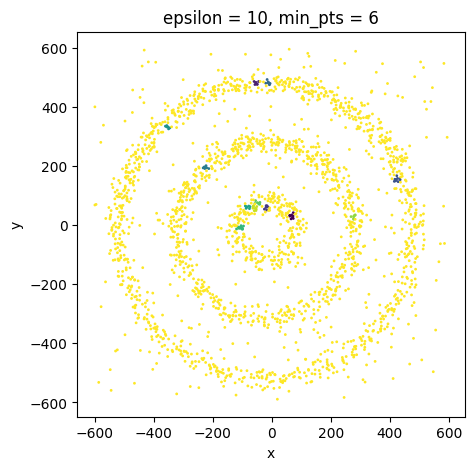

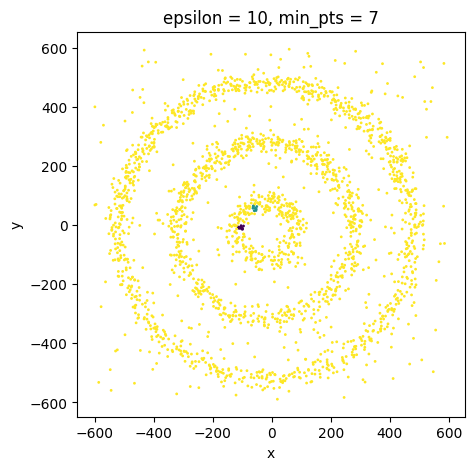

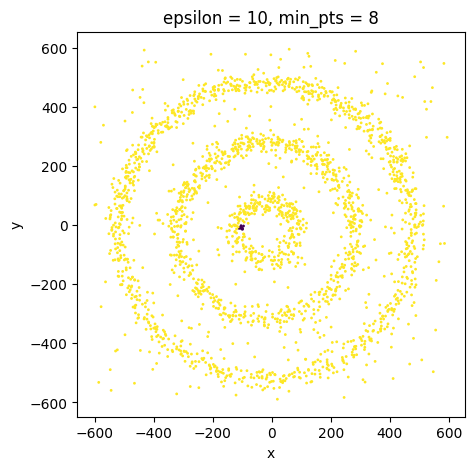

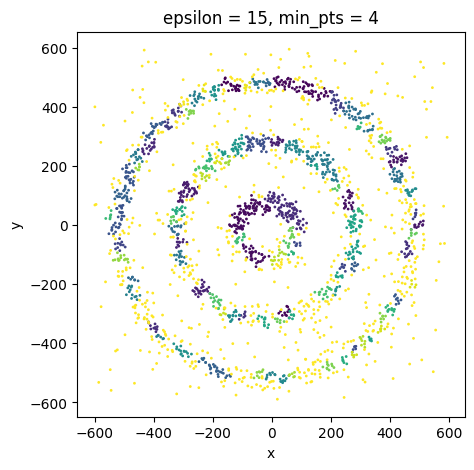

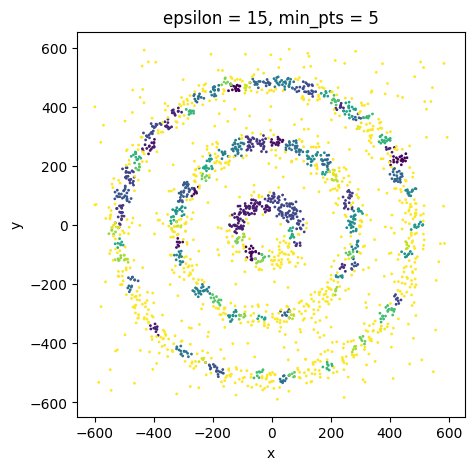

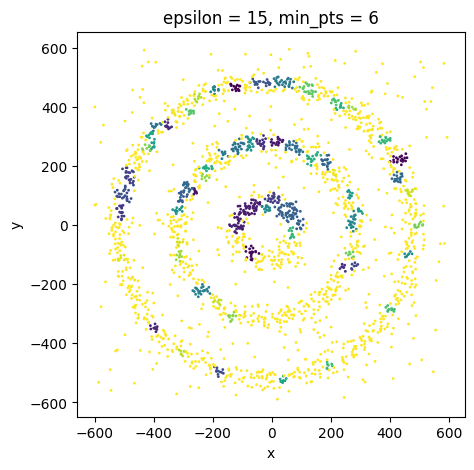

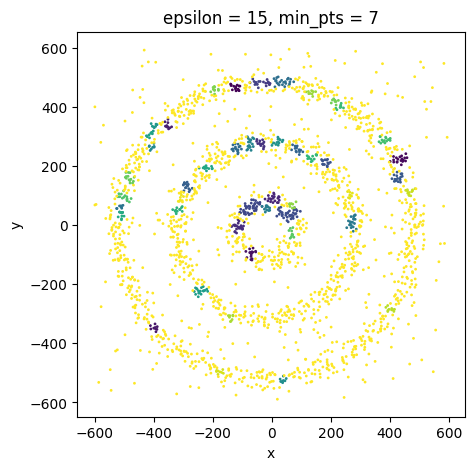

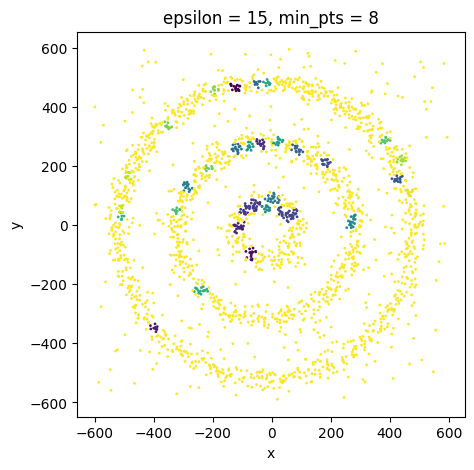

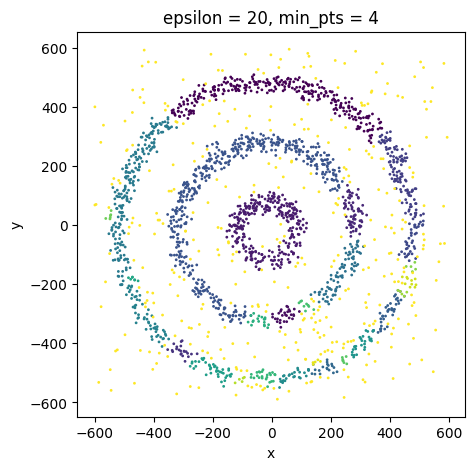

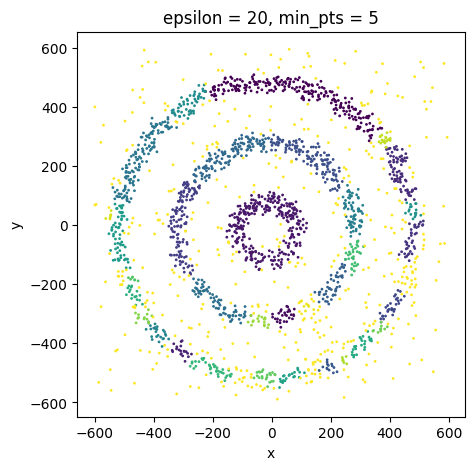

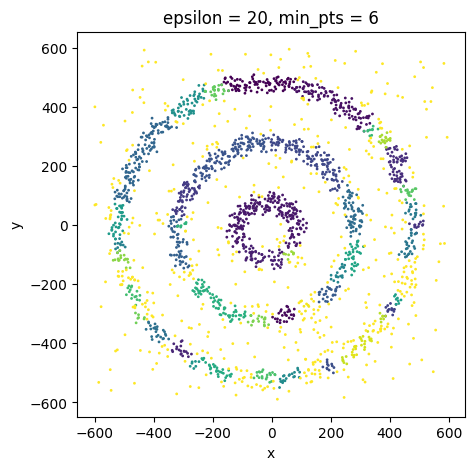

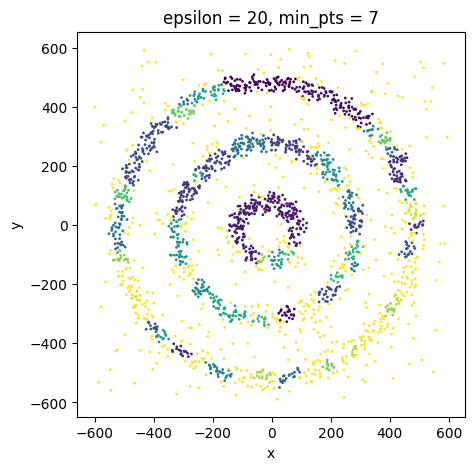

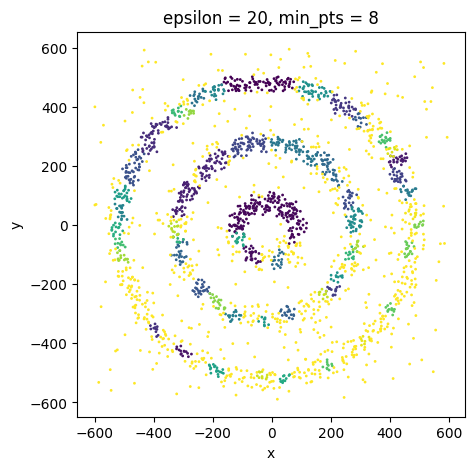

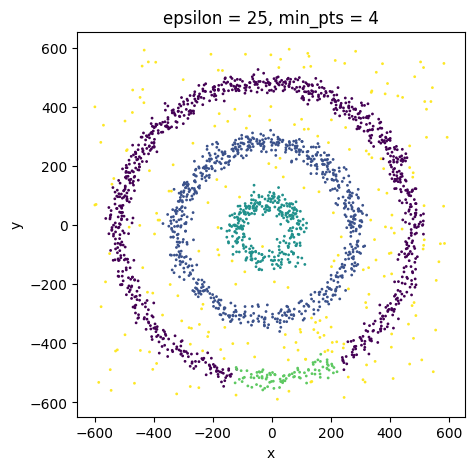

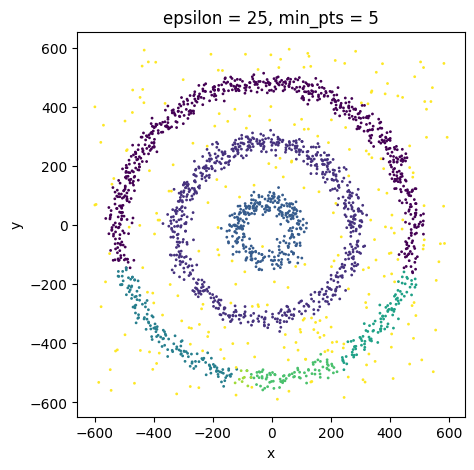

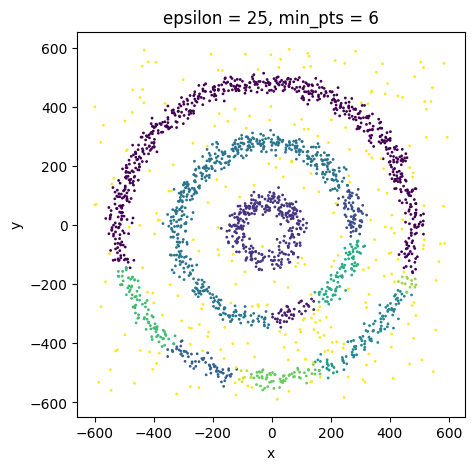

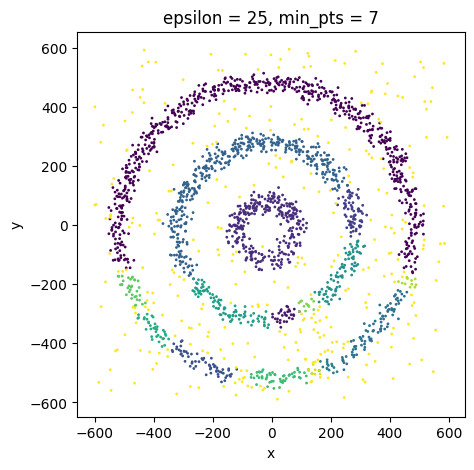

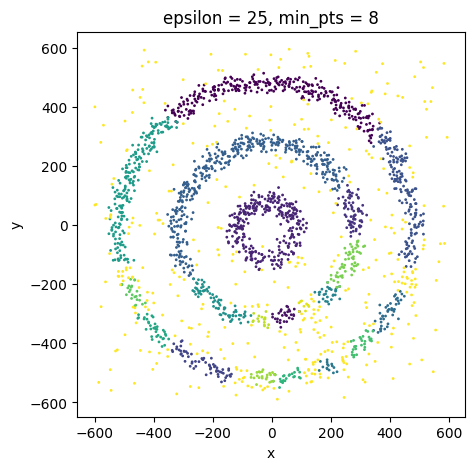

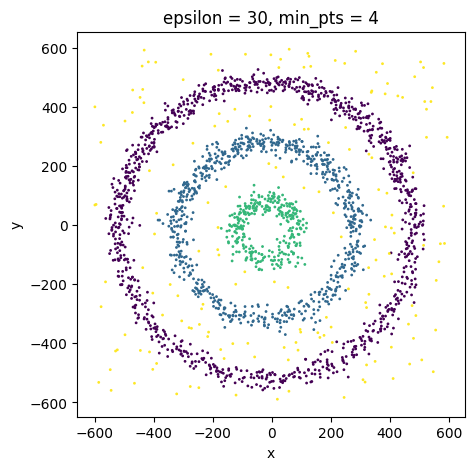

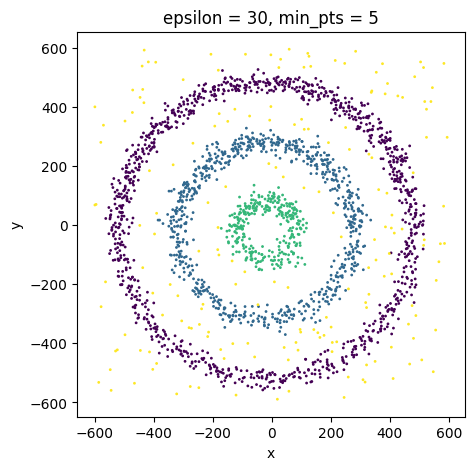

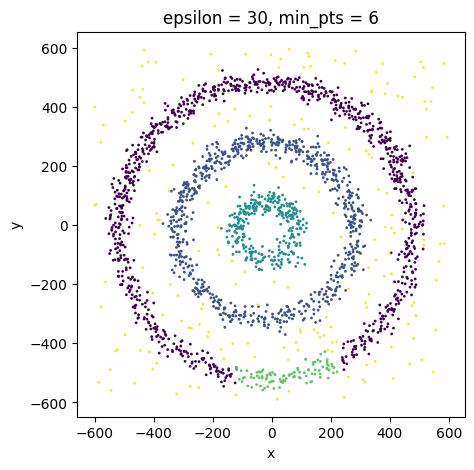

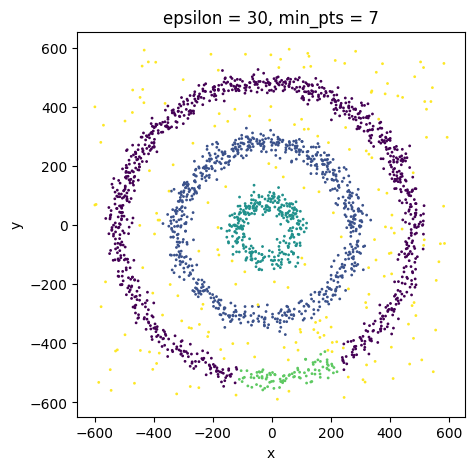

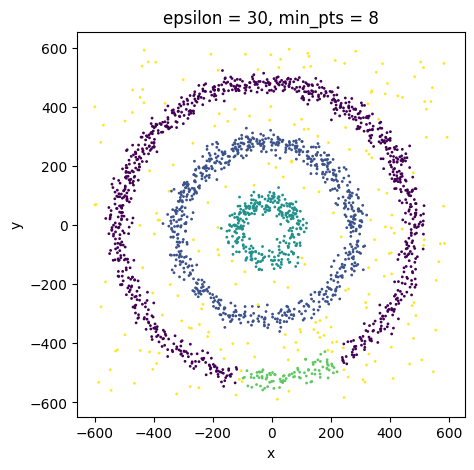

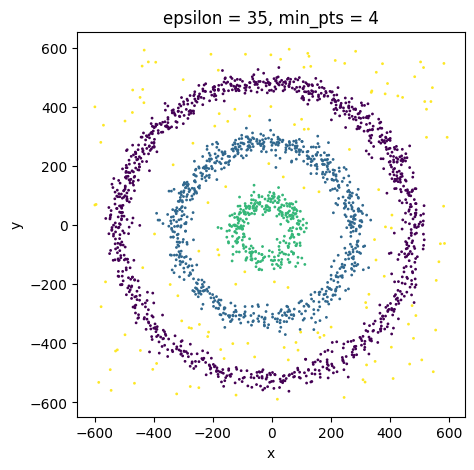

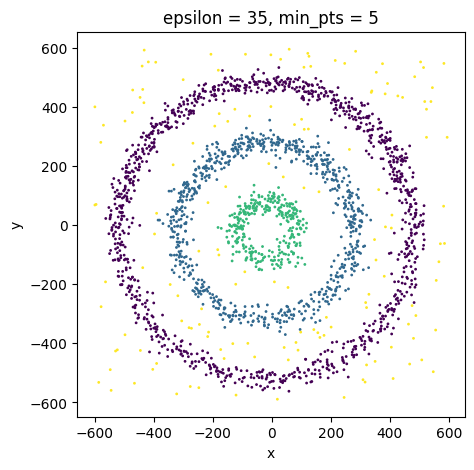

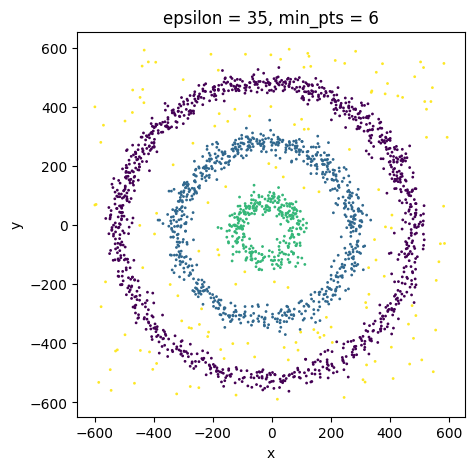

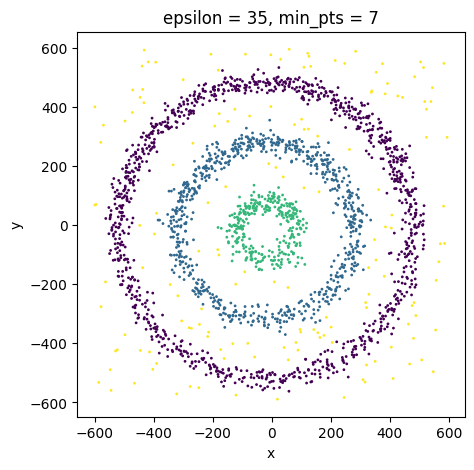

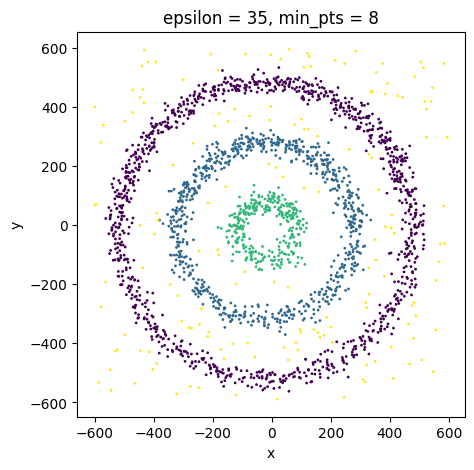

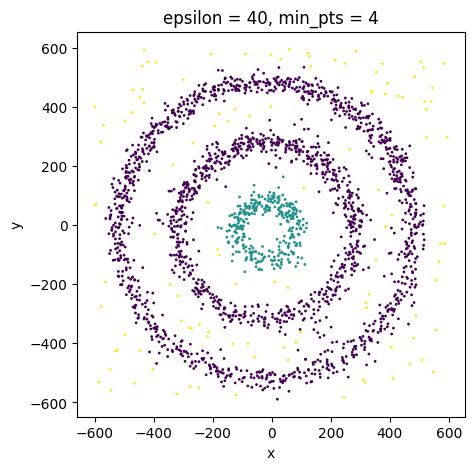

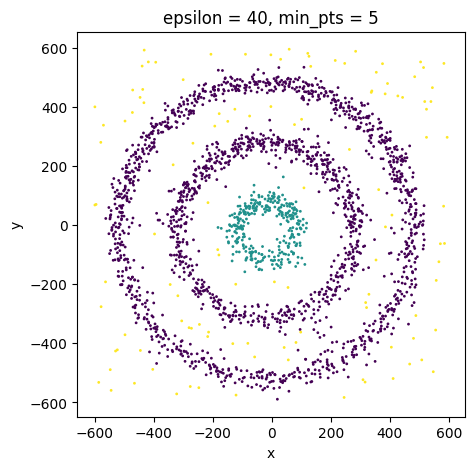

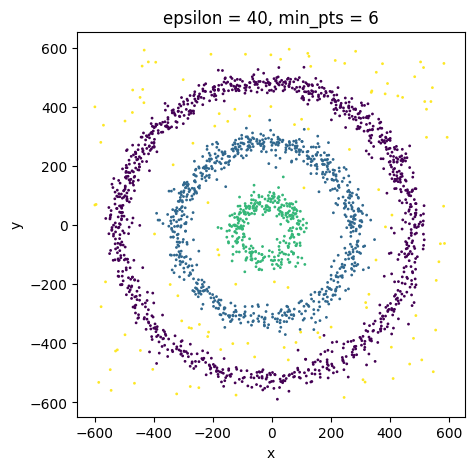

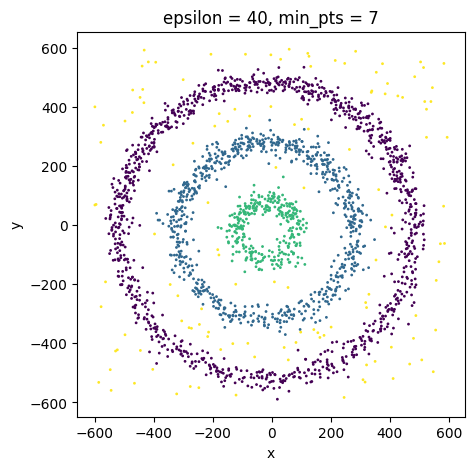

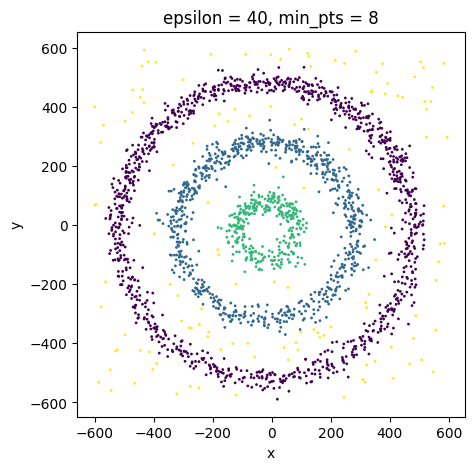

In [ ]:
for i in range(10,41,5):
  for j in range(4,9,1):
    clusters = dbscan(i,data_2,j)
    print(i,j,len(clusters))
    plot_clusters(clusters,data_2,i,j)
#the best plot seems to be occured at epsilon = 30, min_pts = 6

###K-Means Clustering

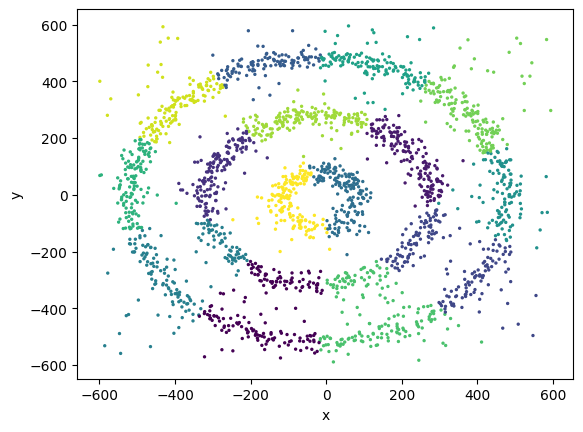

In [ ]:
#k = 3
model = KMeans(n_clusters = 15,n_init='auto')
model.fit(data_2)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x=data_2['0'],y=data_2['1'],c = model.labels_*10,s=[2]*len(data_2))

###Visualizing data(dataset-3)

Text(0, 0.5, 'y')

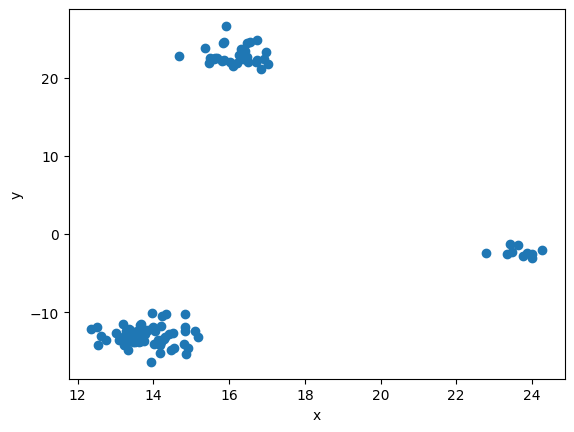

In [ ]:
plt.scatter(x=data_3['0'],y=data_3['1'])
plt.xlabel('x')
plt.ylabel('y')

###Elbow curve - dataset 3

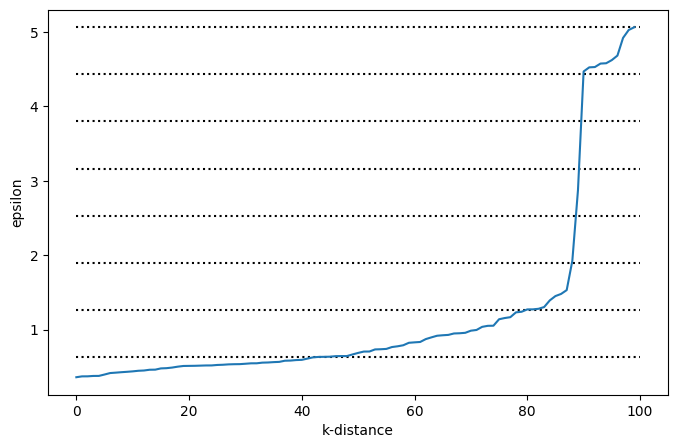

In [ ]:
plt.figure(figsize = (8,5))
elbow = NearestNeighbors(n_neighbors=15).fit(data_3)
distance, _ = elbow.kneighbors(data_3)
distance = [i.mean() for i in distance]
distance = np.sort(distance,axis=0)
maximum = distance[np.argmax(distance)]/8
lines = [maximum*(i+1) for i in range(8)]
#distance = distance[:,3]
plt.xlabel('k-distance')
plt.ylabel('epsilon')
plt.hlines(lines,0,100,colors='k',linestyles='dotted')
plt.plot(distance)

###DBSCAN(dataset-3)

10 3
11 4
12 4
13 4
14 4
15 4
16 4
17 4
18 4
19 4
20 4
21 4
22 4
23 4
24 4
25 4


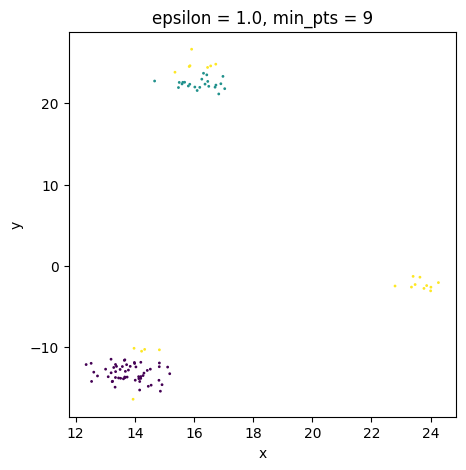

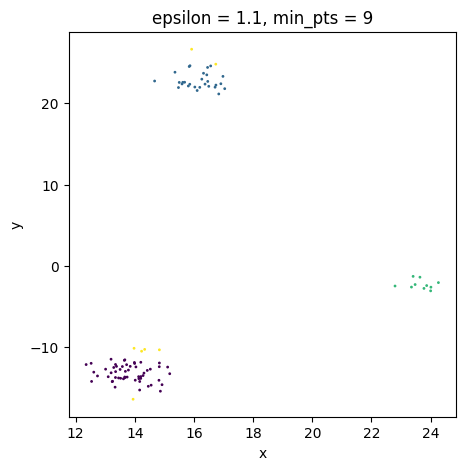

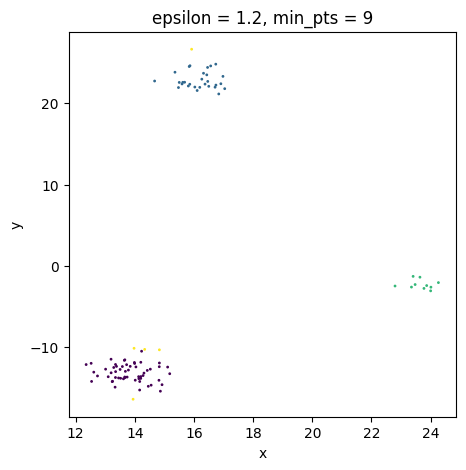

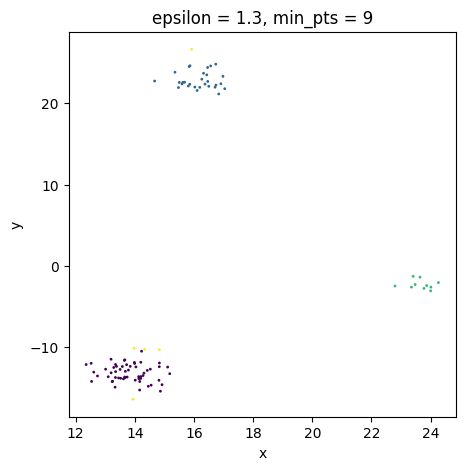

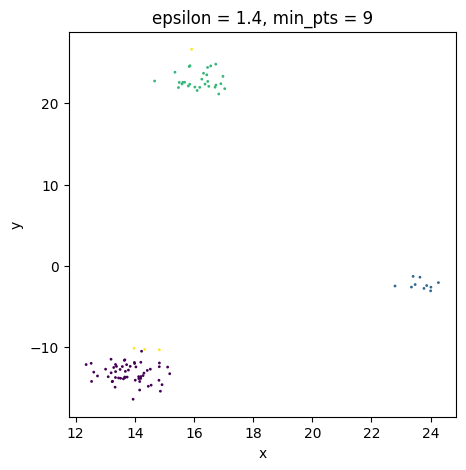

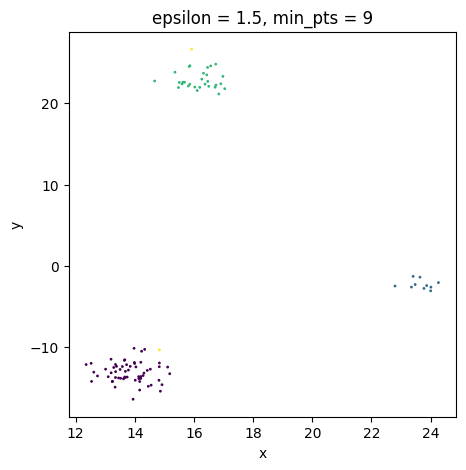

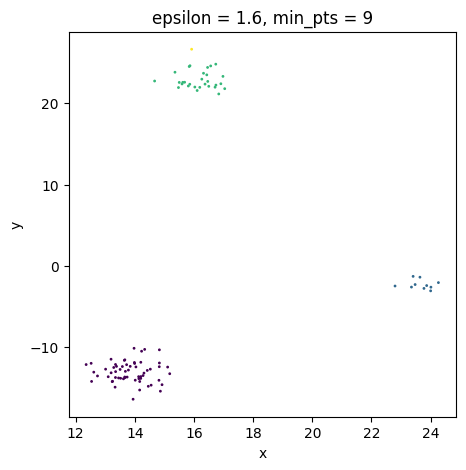

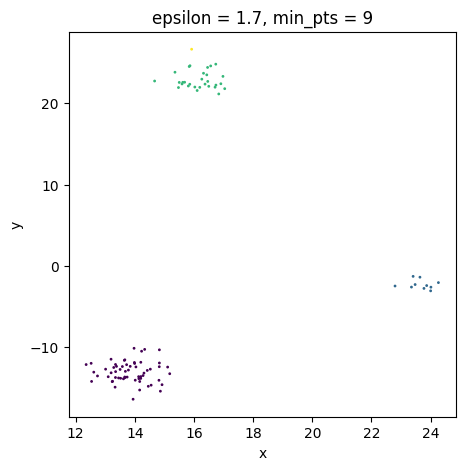

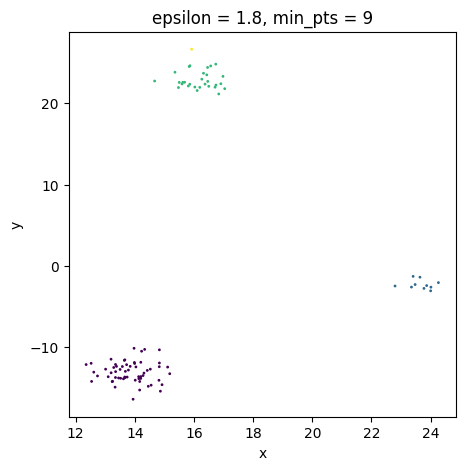

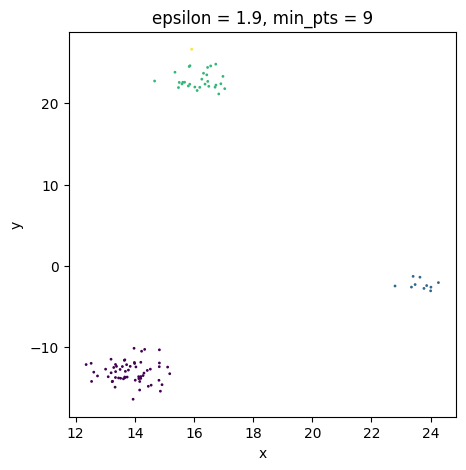

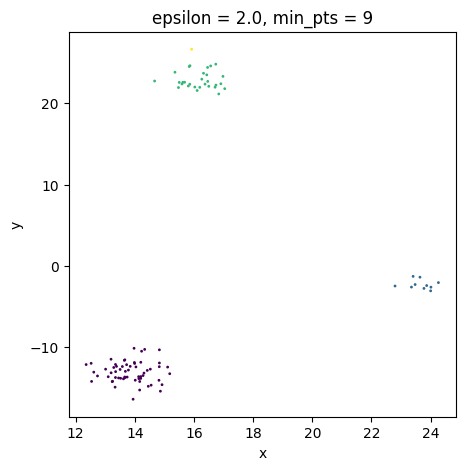

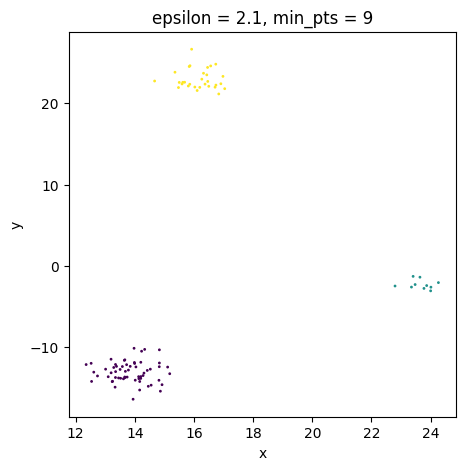

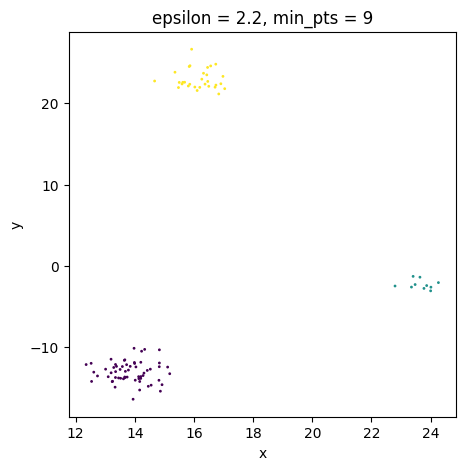

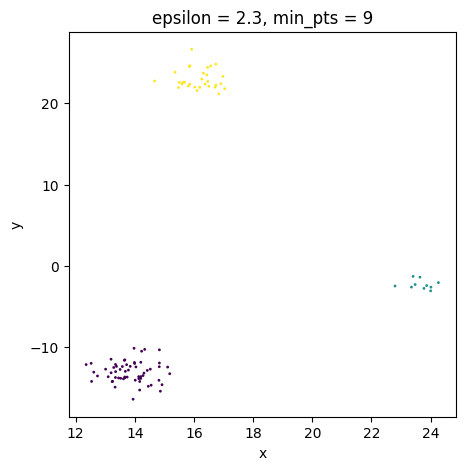

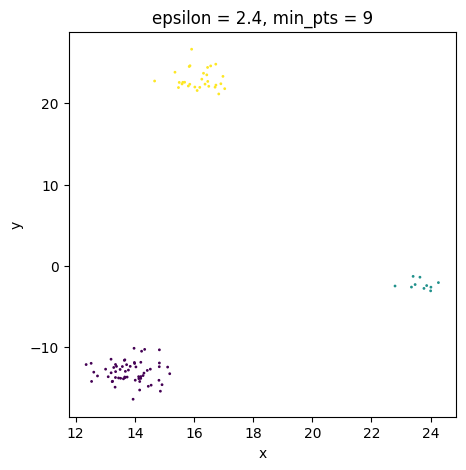

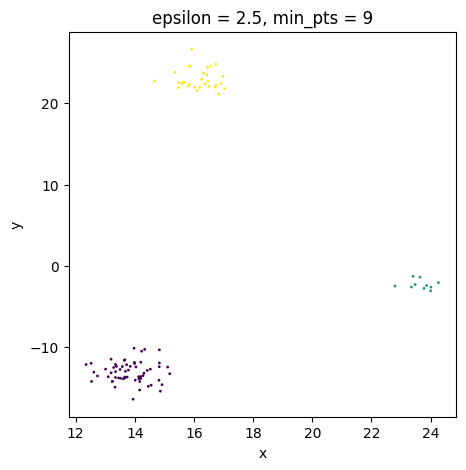

In [ ]:
#epsilon 1 to 2.5
for i in range(10,26,1):
  clusters = dbscan(i/10,data_3,9)
  print(i,len(clusters))
  plot_clusters(clusters,data_3,i/10,9)

###K-Means Clustering(Dataset-3)

Text(0, 0.5, 'y')

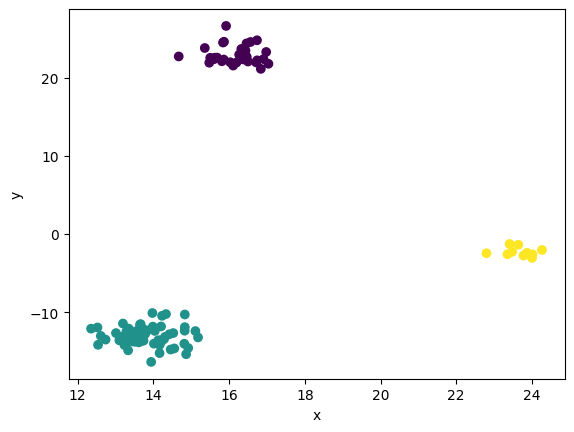

In [ ]:
model = KMeans(n_clusters = 3,n_init='auto')
model.fit(data_3)
plt.scatter(data_3['0'],data_3['1'],c=model.labels_*10)
plt.xlabel('x')
plt.ylabel('y')